In [4]:
import numpy as np
import cv2
import os
import sys
import matplotlib.pyplot as plt
import scienceplots
sys.path.append('/home/yeli/workspace/lard/lard-detection/')
from src.utils.plot_yolov8_heatmap import Yolov8Heatmap

plt.style.use(['science', 'no-latex'])

In [8]:
all_methods = [
    'GradCAM', 
    # 'HiResCAM', 'GradCAMElementWise', 'XGradCAM', 
    # 'GradCAMPlusPlus', 'LayerCAM', 'RandomCAM'
]

path_weights = './../runs/ultralytics/finetune/yolov8n_lska_bifpn_EIoU_aug_all_10_640/triple_split/train/weights/best.pt'
params = {
    'weight': path_weights,
    'device': 'cuda:0',
    'method': all_methods,  # GradCAMPlusPlus, GradCAM, XGradCAM, EigenCAM, HiResCAM, LayerCAM, RandomCAM, EigenGradCAM
    'layer': [10, 13, 16, 19, 21],
    'backward_type': 'all',  # class, box, all
    'conf_threshold': 0.5,  # 0.2+
    'iou_thres': 0.6,
    'max_det': 100,
    'ratio': 0.01,  # 0.02-0.1
    'save_cam': False,
    'show_box': True,
    'renormalize': True
}

path_images = './../results/images/heatmaps/test_imgs'
path_save = './../results/images/heatmaps'
heatmap = Yolov8Heatmap(**params)
all_heapmaps = heatmap(path_images, path_save)

YOLOv8n_lska_bifpn summary: 231 layers, 3105516 parameters, 0 gradients, 8.3 GFLOPs
100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.25s/it]


-KOP9Kub9t8_084.png 2
zHWkj4rKEzA_089.png 2
LbvDOdTVUAU_032.png 2
(1536, 1024, 3)


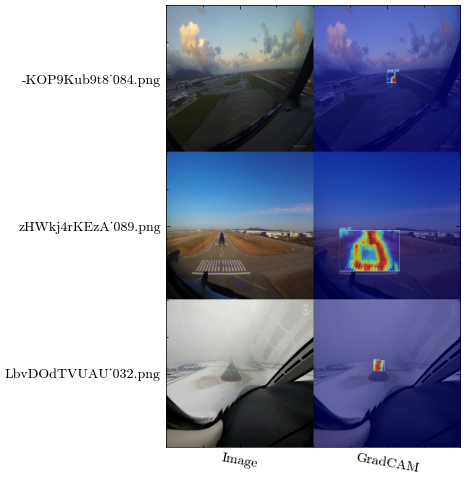

In [9]:
img_sz = 512
big_image = []

all_filenames = os.listdir(path_images)

for filename, list_cam in all_heapmaps.items():
    print(filename, len(list_cam))
    row = []
    for cam in list_cam:
        cam = cv2.resize(cam, (img_sz, img_sz))
        row.append(cam)
    row = np.hstack(row)
    big_image.append(row)

big_image = np.vstack(big_image)
print(big_image.shape)

plt.figure(figsize=(12, 5), dpi=100)
plt.imshow(big_image)
plt.xticks(np.arange(int(img_sz/2), img_sz*(len(all_methods)+1), img_sz), labels=['Image']+all_methods, rotation=-10)
plt.yticks(np.arange(int(img_sz/2), img_sz*len(all_filenames), img_sz), labels=all_filenames)
plt.tight_layout()
plt.savefig(f'{path_save}/heatmaps.jpg', dpi=600)
plt.show()